In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-market/Fish.csv


# Basic Operations

In [2]:
df=pd.read_csv('../input/fish-market/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

We have no empty data. All columns except 'Species' are float, which is in fact logically.

In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

# Exploratory Data Analysis

Let's *pairplot* of all columns

In [7]:
px.pie(df,names='Species')

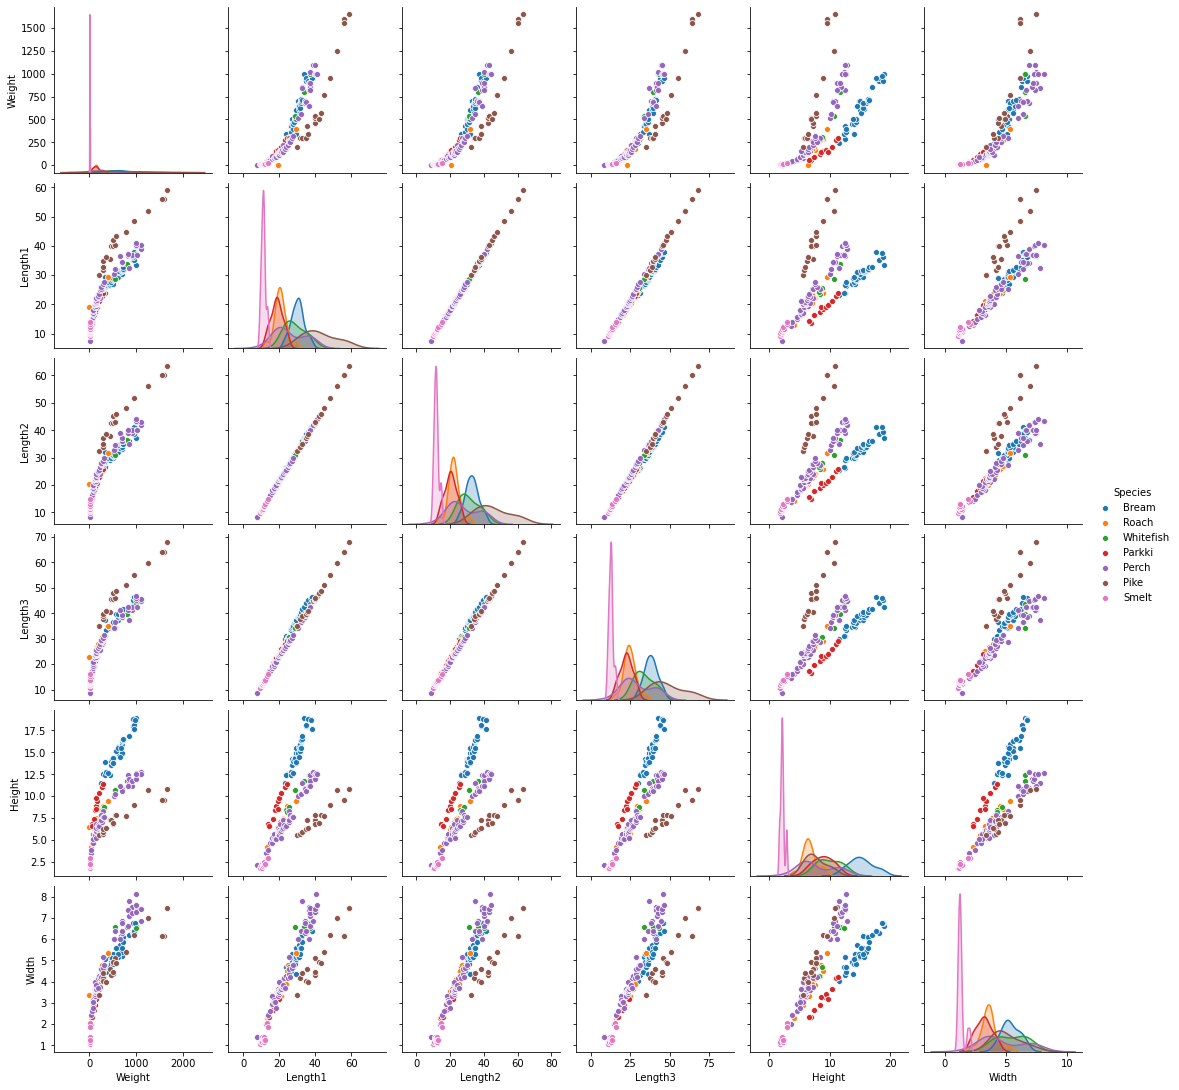

In [8]:
sns.pairplot(df,hue='Species')

We can see from this graph that weight of the fish has linear correlation with its length and width

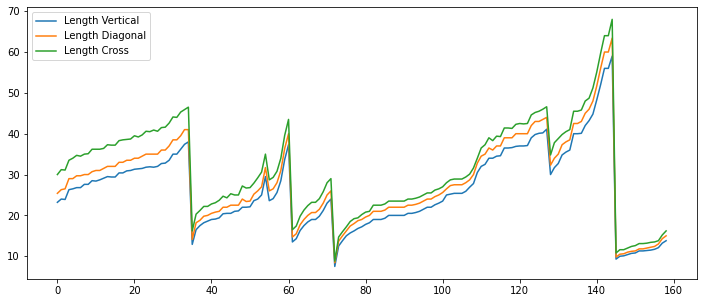

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['Length1'],label='Length Vertical')
plt.plot(df['Length2'],label='Length Diagonal')
plt.plot(df['Length3'],label='Length Cross')
plt.legend()

Generally, pattern of vertical, diagonal and cross length do not differ, but mostly numerically.

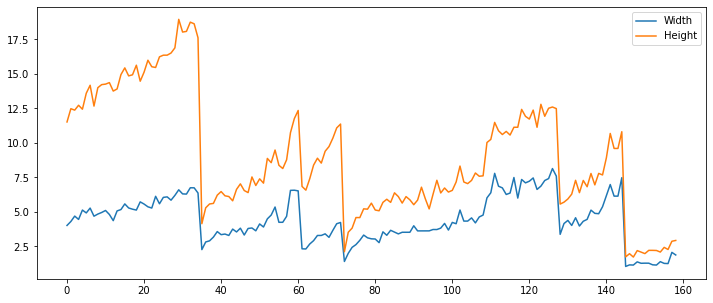

In [10]:
plt.figure(figsize=(12,5))
#plt.plot(df['Weight'],label='Weight')
plt.plot(df['Width'],label='Width')
plt.plot(df['Height'],label='Height')
plt.legend()

In [11]:
px.scatter(df,x='Height',y='Length1',size='Weight',color='Species')

From thorough analysis we can see that weight of a fish no matter its species has different values. However, species such as Smelt and Bream have avarage weight distribution.

In [12]:
px.scatter_3d(df,x='Length1',y='Height',z='Width',size='Weight',color='Species')

# Logistic Regression

I will use Logistic Regression for classification, and further predicting kind of fish according to its weight, vertical, diagonal and corss lengths, height and width.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
X=df.loc[:,'Weight':'Width']
y=df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
print('Dimenstions of Train Set of features:',np.shape(X_train))
print('Dimensions of Train Set of the target:',np.shape(y_train))
print('Dimenstions of Test Set of features:',np.shape(X_test))
print('Dimenstions of Test Set of the target:',np.shape(y_test))

Dimenstions of Train Set of features: (111, 6)
Dimensions of Train Set of the target: (111,)
Dimenstions of Test Set of features: (48, 6)
Dimenstions of Test Set of the target: (48,)


In [16]:
#first I will use default values in Logistic Regression
logreg=LogisticRegression(max_iter=100000).fit(X_train,y_train)

In [17]:
print('Model intercept: ', logreg.intercept_)
print('Model coefficients: ',logreg.coef_)

Model intercept:  [-18.6101833   11.18457962  12.3014701  -21.35706218   3.18660998
  12.36776207   0.92682371]
Model coefficients:  [[ 5.74158928e-03 -5.36725449e-01 -3.35522311e-01  9.91432639e-01
   1.54499337e+00 -1.84727201e-01]
 [ 1.90880674e-02 -9.85598676e-02 -2.39780949e-01 -5.99060635e-01
   1.57285430e+00 -1.50245365e-01]
 [ 2.67881394e-02  4.56590705e-01  1.59502950e+00 -2.16463613e+00
  -7.31047147e-01  3.40827179e-01]
 [ 2.18288249e-03  2.89478763e-01  3.14907260e-01  4.45354289e-01
  -8.07948635e-01 -2.54652242e-01]
 [ 1.99120400e-03  1.75777986e-02 -1.27808529e+00  1.24362836e+00
  -3.02077135e-01  3.81412189e-01]
 [-7.79651260e-02  3.27213995e-01  2.63568931e-02 -1.47716525e-01
  -1.48530906e+00 -5.94316327e-01]
 [ 2.21732434e-02 -4.55575945e-01 -8.29050985e-02  2.30997999e-01
   2.08534307e-01  4.61701767e-01]]


In [18]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.973
Test set score: 0.938


Model has done pretty well.

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
pred1=logreg.predict(X_test)
print(confusion_matrix(y_test,pred1))
print('\n')
print(classification_report(y_test,pred1))

[[13  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 14  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  1  0  2  0  0]]


              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        13
      Parkki       1.00      1.00      1.00         3
       Perch       0.93      1.00      0.97        14
        Pike       1.00      1.00      1.00         5
       Roach       0.67      1.00      0.80         4
       Smelt       1.00      1.00      1.00         6
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.94        48
   macro avg       0.80      0.86      0.82        48
weighted avg       0.89      0.94      0.91        48



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [21]:
logreg.predict([[400,26.0,30.0,37.0,12.3,5.0]])

array(['Bream'], dtype=object)

# Conclusion

Despite we have quite small dataset, our model had done very well with Training set score: 0.973 and Test set score: 0.938.

However, I should here make a small but important remark about performance of a model and dataset at all. Let's look at probability theory in order to undersdant the mislead with good performance.

If we had equally distributed number of species in our dataset, then probability to 'guess' correct one woul be 1/7. In contrast, we have different values of species, totatl comprising of 159 species. So for guessing 'Perch' probability will be 56/159, and other species 35/159, 20/159, 17/159,14/159, 11/159 and 6/159. Quite small number of species in order to have precise demonstration of Logistic Regression. In addition, having several distinc features such as weight, length etc. probability to find correct kind will significantly increase. One way to show high potential is having larger number of species.

If there is an error in my process, please note about that, because I am beginner and every advice will increase my experience!

Thank you!